<a href="https://colab.research.google.com/github/t-taiki0620/0622/blob/master/ward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
with open('/content/drive/MyDrive/卒業演習/tsne-pos-only-obj-2018.json', )as f:
  df = pd.read_json(f)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22115 entries, 0 to 22114
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   22115 non-null  int64  
 1   プロジェクトID             22115 non-null  int64  
 2   公開年度                 22115 non-null  int64  
 3   事業番号1                22115 non-null  object 
 4   事業番号2                22115 non-null  int64  
 5   事業番号3                150 non-null    float64
 6   主要政策・施策              22115 non-null  object 
 7   府省庁                  22115 non-null  object 
 8   事業名                  22115 non-null  object 
 9   事業の目的                22115 non-null  object 
 10  事業概要                 22115 non-null  object 
 11  執行額                  22115 non-null  float64
 12  objective_x          22115 non-null  float64
 13  objective_y          22115 non-null  float64
 14  cluster_in_ministry  22115 non-null  int64  
 15  ALL                  22115 non-null 

In [ ]:
df = df.drop(columns=['高齢社会対策', '男女共同参画', '少子化社会対策', '子ども・若者育成支援', '国土強靱化施策', '障害者施策', '地方創生', '科学技術・イノベーション', 'ＩＴ戦略', '一億総活躍推進', '海洋政策', '観光立国', '宇宙開発利用', '地球温暖化対策', 'ＯＤＡ', '自殺対策', '医療分野の研究開発関連', '沖縄振興', '知的財産', '2020年東京オリパラ', '犯罪被害者等施策', 'クールジャパン', '食育推進', 'その他'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22115 entries, 0 to 22114
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   22115 non-null  int64  
 1   プロジェクトID             22115 non-null  int64  
 2   公開年度                 22115 non-null  int64  
 3   事業番号1                22115 non-null  object 
 4   事業番号2                22115 non-null  int64  
 5   事業番号3                150 non-null    float64
 6   主要政策・施策              22115 non-null  object 
 7   府省庁                  22115 non-null  object 
 8   事業名                  22115 non-null  object 
 9   事業の目的                22115 non-null  object 
 10  事業概要                 22115 non-null  object 
 11  執行額                  22115 non-null  float64
 12  objective_x          22115 non-null  float64
 13  objective_y          22115 non-null  float64
 14  cluster_in_ministry  22115 non-null  int64  
 15  ALL                  22115 non-null 

In [ ]:
df = df.drop(columns=['ALL', 'cluster_in_ministry', '執行額', '事業概要', '事業の目的', '府省庁', '主要政策・施策', '事業番号3', '事業番号2', '事業番号1'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22115 entries, 0 to 22114
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           22115 non-null  int64  
 1   プロジェクトID     22115 non-null  int64  
 2   公開年度         22115 non-null  int64  
 3   事業名          22115 non-null  object 
 4   objective_x  22115 non-null  float64
 5   objective_y  22115 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
df

,ID,プロジェクトID,公開年度,事業名,objective_x,objective_y
0,13,16,2015,内閣広報経費,-3.427058,36.508163
1,10604,16,2017,内閣広報経費,-3.443014,36.496967
2,24982,16,2019,内閣広報経費,-3.433842,36.497105
3,15765,16,2018,内閣広報経費,20.884544,130.967896
4,5377,16,2016,内閣広報経費,-3.429540,36.508717
...,...,...,...,...,...,...
22110,22976,8983,2019,中小企業・小規模事業者人材対策事業,-0.105321,-19.544006
22111,25938,44,2019,中長期の経済運営に必要な経費,28.377846,-26.652079
22112,25500,4895,2019,農山漁村振興交付金,-7.667183,-13.079095
22113,13514,4916,2017,農林水産物の品目別輸出促進緊急対策事業,-43.182682,-32.702126


In [ ]:
df_2018 = df.iloc[0:0]
print(df_2018)
cnt = 0
for i in range(len(df)):
  if df.loc[i]['公開年度'] == 2018:
    df_2018.loc[cnt] = df.loc[i]
    cnt += 1

             ID  プロジェクトID  ...               4371                 4372
ID          NaN       NaN  ...              19154                18677
プロジェクトID    NaN       NaN  ...               3708                 4916
公開年度        NaN       NaN  ...               2018                 2018
事業名         NaN       NaN  ...  中小企業・小規模事業者人材対策事業  農林水産物の品目別輸出促進緊急対策事業
objective_x NaN       NaN  ...            73.6309               123.48
objective_y NaN       NaN  ...            84.8479              24.7578

[6 rows x 4379 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_2018

,ID,プロジェクトID,公開年度,事業名,objective_x,objective_y
0,15765,16,2018,内閣広報経費,20.884544,130.967896
1,15755,15,2018,内閣人事局経費,103.928268,10.411826
2,15926,52,2018,人道救援物資備蓄経費,113.718193,44.782299
3,15964,35,2018,クールジャパン戦略推進経費,103.873520,-200.275986
4,15924,84,2018,国際平和協力隊の派遣等経費,-26.981586,-211.417206
...,...,...,...,...,...,...
4368,20146,3574,2018,短期寿命気候汚染物質削減に関する国際パートナーシップ拠出金関連業務,-57.778313,58.734795
4369,15941,44,2018,中長期の経済運営に必要な経費,-65.265366,-4.675023
4370,18840,4895,2018,農山漁村振興交付金,-177.072800,75.405853
4371,19154,3708,2018,中小企業・小規模事業者人材対策事業,73.630852,84.847870


In [ ]:
df_exp = df_2018.drop(columns=['ID', 'プロジェクトID', '公開年度', '事業名'])

In [ ]:
df_exp

,objective_x,objective_y
0,20.884544,130.967896
1,103.928268,10.411826
2,113.718193,44.782299
3,103.873520,-200.275986
4,-26.981586,-211.417206
...,...,...
4368,-57.778313,58.734795
4369,-65.265366,-4.675023
4370,-177.072800,75.405853
4371,73.630852,84.847870


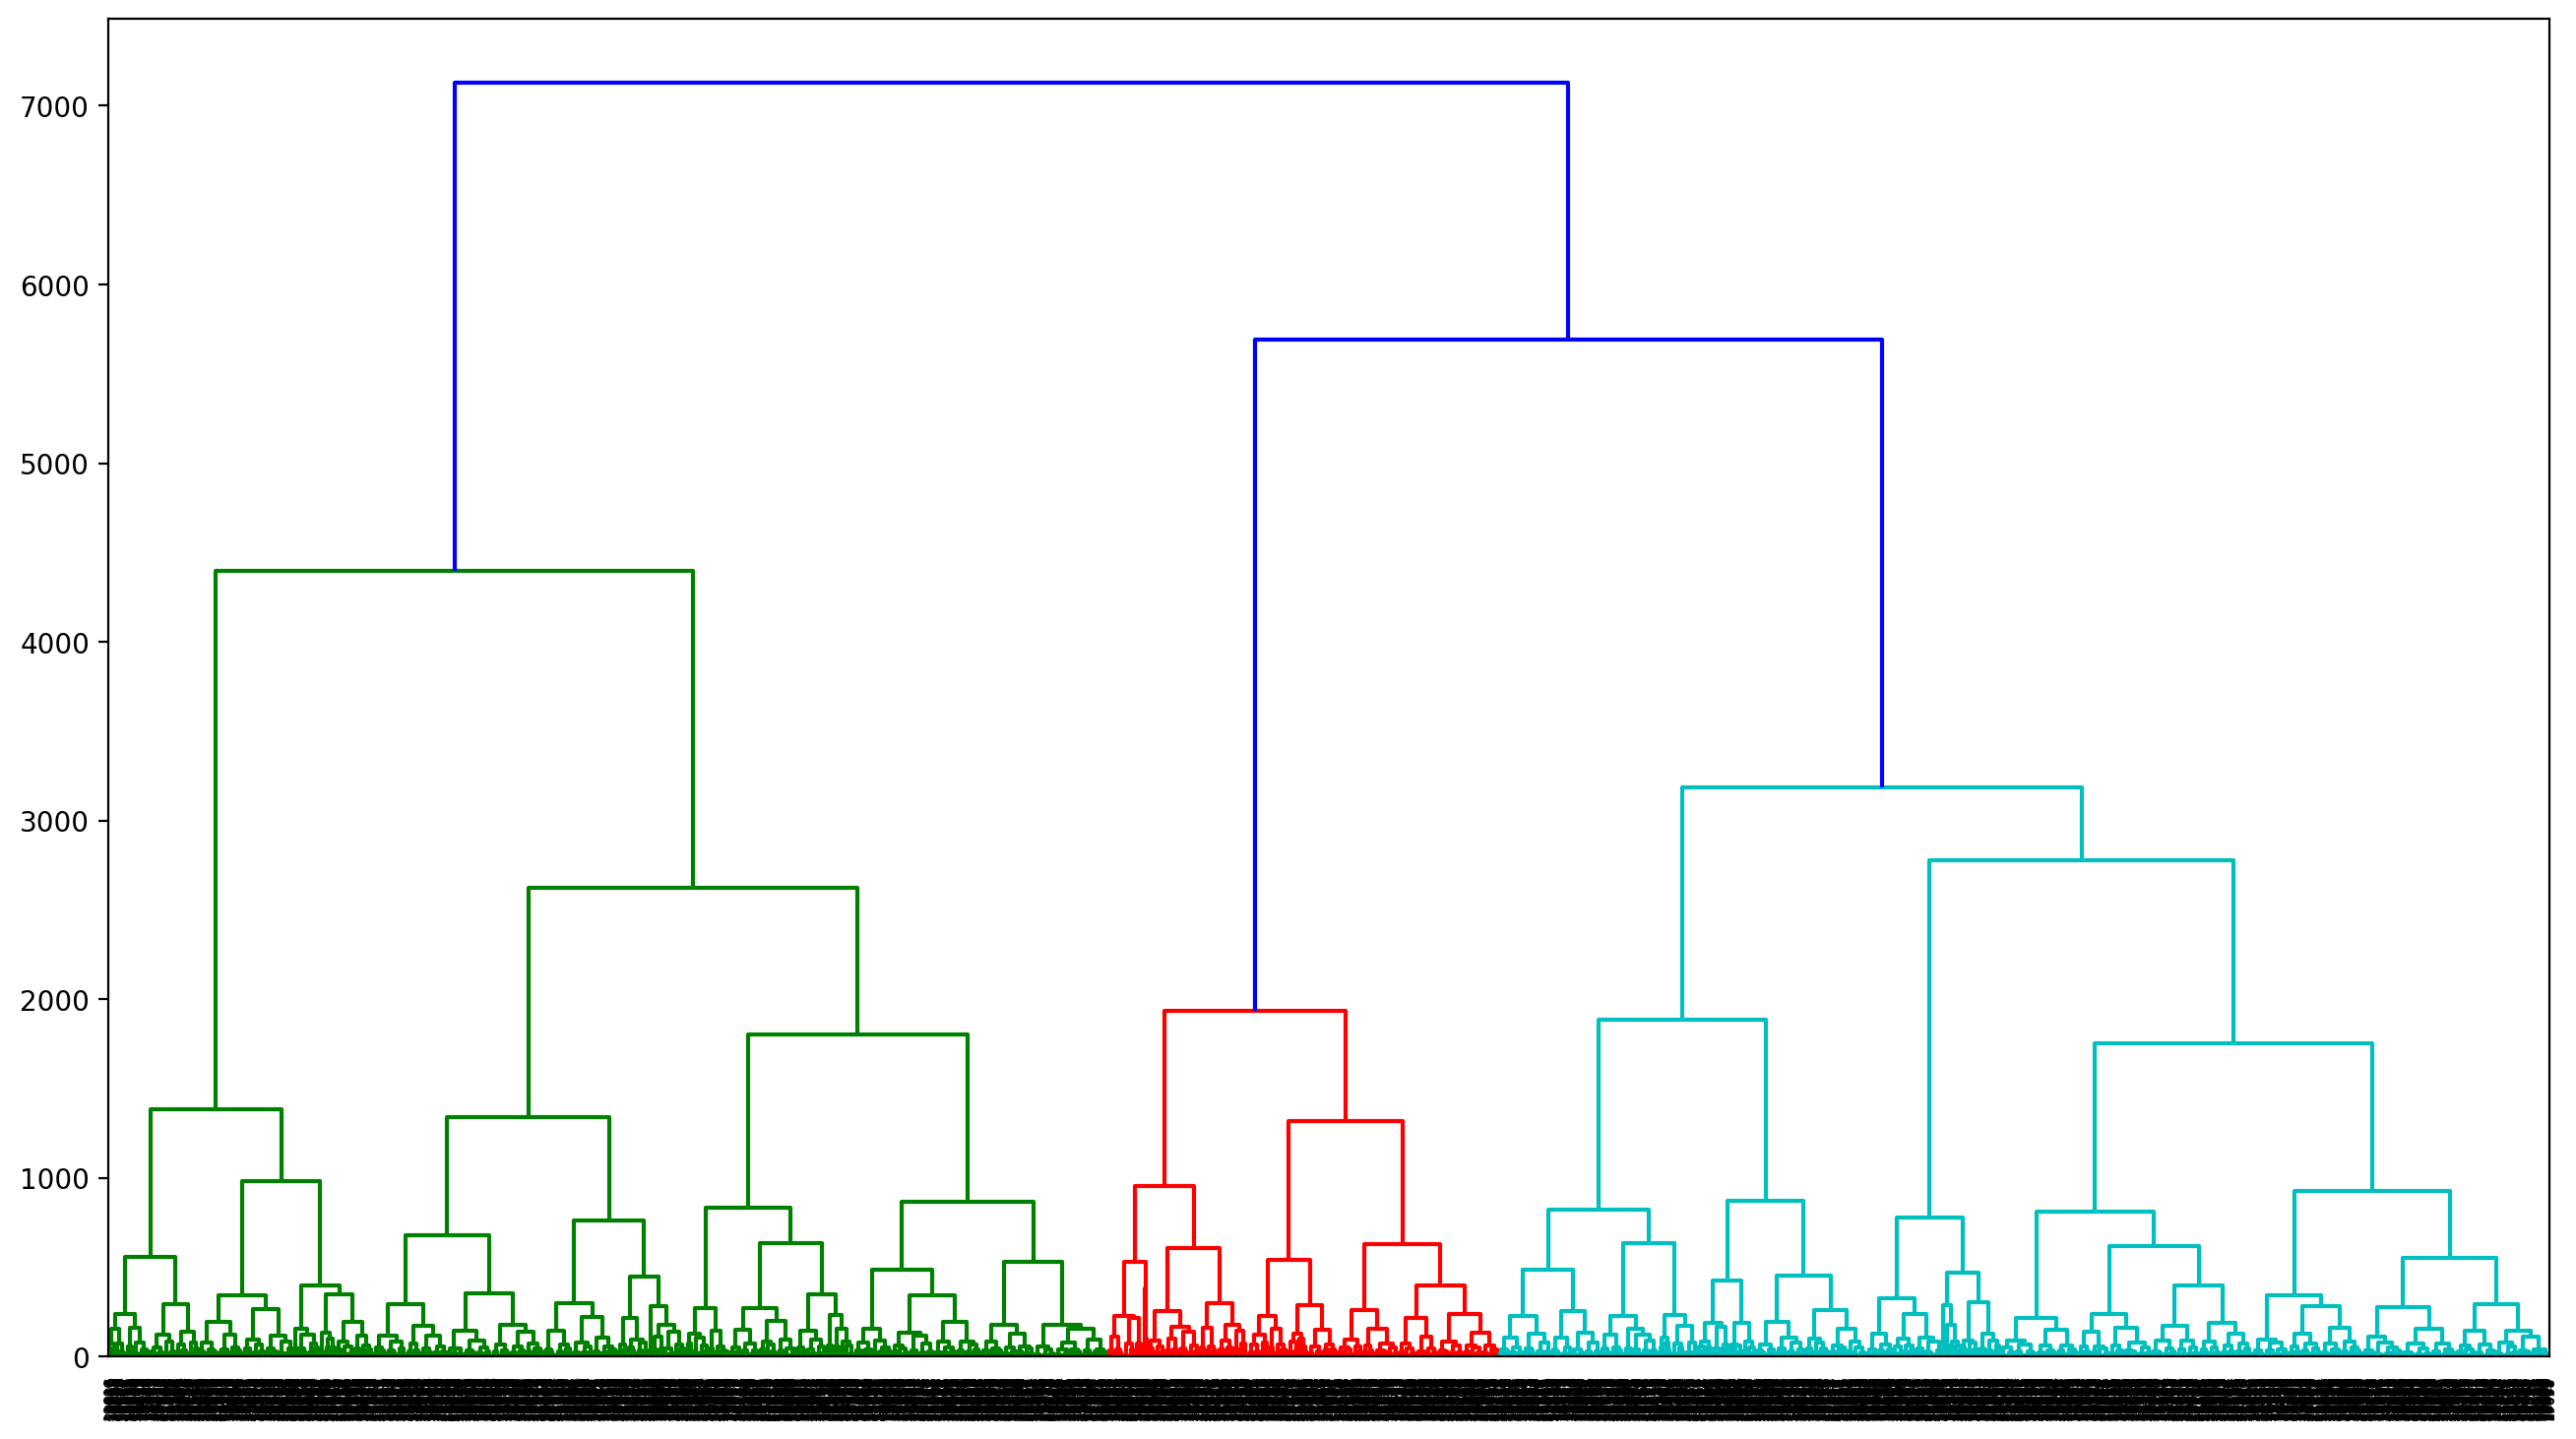

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(df_exp, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df.index)
plt.show()

In [ ]:
linkage_result

[[2.01500000e+03 2.58900000e+03 0.00000000e+00 2.00000000e+00]
 [2.30000000e+01 6.66000000e+02 0.00000000e+00 2.00000000e+00]
 [3.90000000e+01 4.24000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [8.73400000e+03 8.73900000e+03 4.39552758e+03 1.79000000e+03]
 [8.73800000e+03 8.74100000e+03 5.69392755e+03 2.58300000e+03]
 [8.74200000e+03 8.74300000e+03 7.12969415e+03 4.37300000e+03]]


In [ ]:
linkage_result[3]

array([4.000e+01, 2.511e+03, 0.000e+00, 2.000e+00])

In [ ]:
import json
with open('/content/drive/MyDrive/Colab Notebooks/pre-judgit/test.json', 'w', encoding='utf8')as f:
  for data in linkage_result:
    f.write(json.dumps(data, ensure_ascii=False) + '\n')

TypeError: ignored

In [ ]:
for data in linkage_result:
  print(data)

[2.015e+03 2.589e+03 0.000e+00 2.000e+00]
[ 23. 666.   0.   2.]
[ 39. 424.   0.   2.]
[4.000e+01 2.511e+03 0.000e+00 2.000e+00]
[ 50. 601.   0.   2.]
[  54. 1739.    0.    2.]
[5.800e+01 3.647e+03 0.000e+00 2.000e+00]
[  64. 1894.    0.    2.]
[7.900e+01 2.316e+03 0.000e+00 2.000e+00]
[8.200e+01 3.825e+03 0.000e+00 2.000e+00]
[9.0e+01 3.4e+03 0.0e+00 2.0e+00]
[9.30e+01 3.81e+03 0.00e+00 2.00e+00]
[ 98. 307.   0.   2.]
[1.010e+02 3.851e+03 0.000e+00 2.000e+00]
[103. 595.   0.   2.]
[1.090e+02 3.971e+03 0.000e+00 2.000e+00]
[2.856e+03 3.448e+03 0.000e+00 2.000e+00]
[1.20e+02 3.47e+03 0.00e+00 2.00e+00]
[ 126. 1339.    0.    2.]
[1.320e+02 3.665e+03 0.000e+00 2.000e+00]
[134. 245.   0.   2.]
[1.350e+02 3.982e+03 0.000e+00 2.000e+00]
[140. 657.   0.   2.]
[1.430e+02 4.267e+03 0.000e+00 2.000e+00]
[1.440e+02 2.633e+03 0.000e+00 2.000e+00]
[145. 913.   0.   2.]
[ 150. 1693.    0.    2.]
[7.940e+02 4.216e+03 0.000e+00 2.000e+00]
[1.620e+02 3.192e+03 0.000e+00 2.000e+00]
[1107. 1109.    0.    

In [ ]:
cols = ['objective_x', 'objective_y']
df_exp = pd.DataFrame(index=[], columns=cols)
for i in range(len(df_2018)):
  df_exp.loc[df_2018.loc[i]['事業名']]['objective_x'] = df_2018.loc[i]['objective_x']
  df_exp.loc[df_2018.loc[i]['事業名']]['objective_y'] = df_2018.loc[i]['objective_y']

KeyError: ignored

In [ ]:
df_remake.append(df.loc[0])

,ID,プロジェクトID,公開年度,事業名,objective_x,objective_y
0,13,16,2015,内閣広報経費,-3.427058,36.508163


In [ ]:
df_remake

,ID,プロジェクトID,公開年度,事業名,objective_x,objective_y


In [ ]:
df_blank = df.iloc[0:0]
print(df_blank)
df1 = df_blank.append(df)
print(df1)

Empty DataFrame
Columns: [ID, プロジェクトID, 公開年度, 事業名, objective_x, objective_y]
Index: []
          ID  プロジェクトID  公開年度                  事業名  objective_x  objective_y
0         13        16  2015               内閣広報経費    -3.427058    36.508163
1      10604        16  2017               内閣広報経費    -3.443014    36.496967
2      24982        16  2019               内閣広報経費    -3.433842    36.497105
3      15765        16  2018               内閣広報経費    20.884544   130.967896
4       5377        16  2016               内閣広報経費    -3.429540    36.508717
...      ...       ...   ...                  ...          ...          ...
22110  22976      8983  2019    中小企業・小規模事業者人材対策事業    -0.105321   -19.544006
22111  25938        44  2019       中長期の経済運営に必要な経費    28.377846   -26.652079
22112  25500      4895  2019            農山漁村振興交付金    -7.667183   -13.079095
22113  13514      4916  2017  農林水産物の品目別輸出促進緊急対策事業   -43.182682   -32.702126
22114  18677      4916  2018  農林水産物の品目別輸出促進緊急対策事業   123.480263    24.757841

